## Import Libraries


In [36]:
import numpy as np
import pandas as pd
import os

In [37]:
os.chdir('C:/Users/user/Desktop/Classification/Ann/Logistic/Logistic_reg/')

## read the input file

In [38]:
data = pd.read_csv('purchase_prediction.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [40]:
# Column - user id is not useful for the model, so lets drop it
data = data.drop(['User ID'], axis = 1)

## Data Split

In [41]:
# Seperate the dependent and independent variables

In [42]:
X= data.iloc[:,: -1].values # remove the last variable alone
y= data.iloc[:,3].values # get all the first 4 features / input variable in a variable y

In [43]:
# pd.DataFrame(y)

In [44]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        X, y, test_size = 0.25, random_state = 0) 

## Build Logistic regression

Model will fail , because it has a categorical data.

In [45]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'Female'

### Data Wrangling - Label encoding

In [24]:
# import the library
from sklearn import preprocessing

In [25]:
# create an object for label encoding
le = preprocessing.LabelEncoder()

In [26]:
X[:,0] = le.fit_transform(X[:,0])

In [27]:
pd.DataFrame(X).head()
# Male and female gets converted into 1 and 0 respectively

,0,1,2
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000


In [129]:
# build the model after data split again

In [28]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        X, y, test_size = 0.25, random_state = 0) 

In [29]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
# Predict model
y_pred = classifier.predict(xtest) 

## Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [32]:

cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[68  0]
 [32  0]]


In [33]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.68


In [34]:
print(classification_report(ytest, y_pred) )

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [141]:
### Scale the data and build the model

In [142]:
data = pd.read_csv('purchase_prediction.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [143]:
# Column - user id is not useful for the model, so lets drop it
data = data.drop(['User ID'], axis = 1)

X= data.iloc[:,: -1].values # remove the last variable alone
y= data.iloc[:,3].values # get all the first 4 features / input variable in a variable y

In [144]:
# label encoding

# import the library
from sklearn import preprocessing
# create an object for label encoding
le = preprocessing.LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [147]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        X, y, test_size = 0.25, random_state = 0) 

## Transform the data

In [148]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain)  
xtest = sc_x.transform(xtest) 
  
print (xtrain[0:10, :]) 

[[-0.98019606  0.58164944 -0.88670699]
 [ 1.02020406 -0.60673761  1.46173768]
 [-0.98019606 -0.01254409 -0.5677824 ]
 [-0.98019606 -0.60673761  1.89663484]
 [-0.98019606  1.37390747 -1.40858358]
 [-0.98019606  1.47293972  0.99784738]
 [ 1.02020406  0.08648817 -0.79972756]
 [ 1.02020406 -0.01254409 -0.24885782]
 [-0.98019606 -0.21060859 -0.5677824 ]
 [-0.98019606 -0.21060859 -0.19087153]]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [149]:
#Model building

In [150]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(xtrain, ytrain) 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
#prediction
y_pred = classifier.predict(xtest) 

In [154]:
#model evaluation

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 




In [155]:
cm = confusion_matrix(ytest, y_pred) 
  
print ("Confusion Matrix : \n", cm) 

Confusion Matrix : 
 [[65  3]
 [ 6 26]]


In [153]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(ytest, y_pred)) 

Accuracy :  0.91


In [ ]:
##Inference : Accuracy has increased well and the accuracy with scaled data is 91%

In [157]:
print(classification_report(ytest, y_pred) )

              precision    recall  f1-score   support

           0       0.92      0.96      0.94        68
           1       0.90      0.81      0.85        32

   micro avg       0.91      0.91      0.91       100
   macro avg       0.91      0.88      0.89       100
weighted avg       0.91      0.91      0.91       100



In [177]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

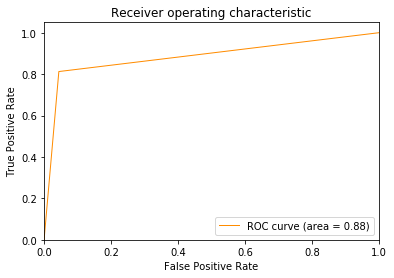

In [178]:

fpr, tpr, thresholds = roc_curve(ytest,y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()